### 1. Chi Squared Test : categorical variables
Chi-squared test in R can be used to test if two categorical variables are dependent, by means of a contingency table.

Example use case: 
You may want to figure out if big budget films become box-office hits. 
We got 2 categorical variables (Budget of film, Success Status) each with 2 factors (Big/Low budget and Hit/Flop), which forms a 2 x 2 matrix.

In [13]:
cars1 <- mtcars # original data

In [10]:
head(cars1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [14]:
chisq.test(table(cars1$cyl, cars1$gear), correct = FALSE)  # Yates continuity correction not applied
#or
summary(table(cars1$cyl, cars1$gear)) # performs a chi-squared test.

Warning message in chisq.test(table(cars1$cyl, cars1$gear), correct = FALSE):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(cars1$cyl, cars1$gear)
X-squared = 18.036, df = 4, p-value = 0.001214


Number of cases in table: 32 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 18.036, df = 4, p-value = 0.001214
	Chi-squared approximation may be incorrect

#### How to tell if x, y are independent?

There are two ways to tell if they are independent:

* By looking at the p-Value: If the p-Value is less that 0.05, we fail to reject the null hypothesis that the x and y are independent. 
* From Chi.sq value: For 2 x 2 contingency tables with 2 degrees of freedom (d.o.f), if the Chi-Squared calculated is greater than 3.841 (critical value), we reject the null hypothesis that the variables are independent. To find the critical value of larger d.o.f contingency tables, use qchisq(0.95, n-1), where n is the number of variables.

### 2.Correlation : continuous variables

To test the linear relationship of two continuous variables,  The null hypothesis is that the true correlation between x and y is zero.

In [15]:
cor.test(cars$speed, cars$dist)


	Pearson's product-moment correlation

data:  cars$speed and cars$dist
t = 9.464, df = 48, p-value = 1.49e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6816422 0.8862036
sample estimates:
      cor 
0.8068949 


Warning message:
"package 'corrplot' was built under R version 3.3.3"Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""addcolorlabel" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""addcolorlabel" is not a graphical parameter"Warning message in title(title, ...):
""addcolorlabel" is not a graphical parameter"

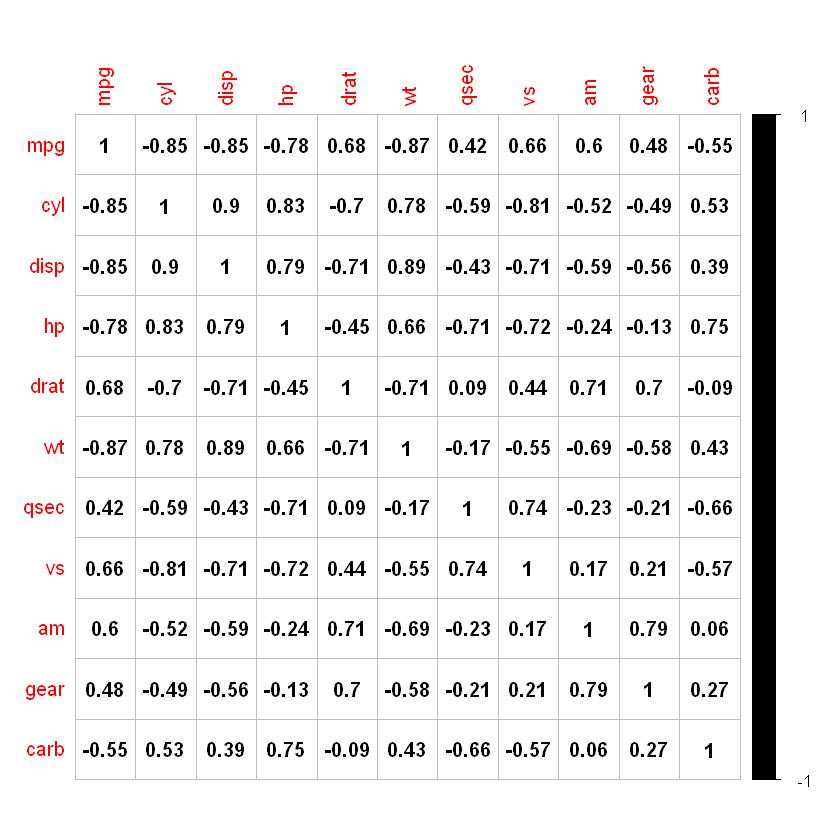

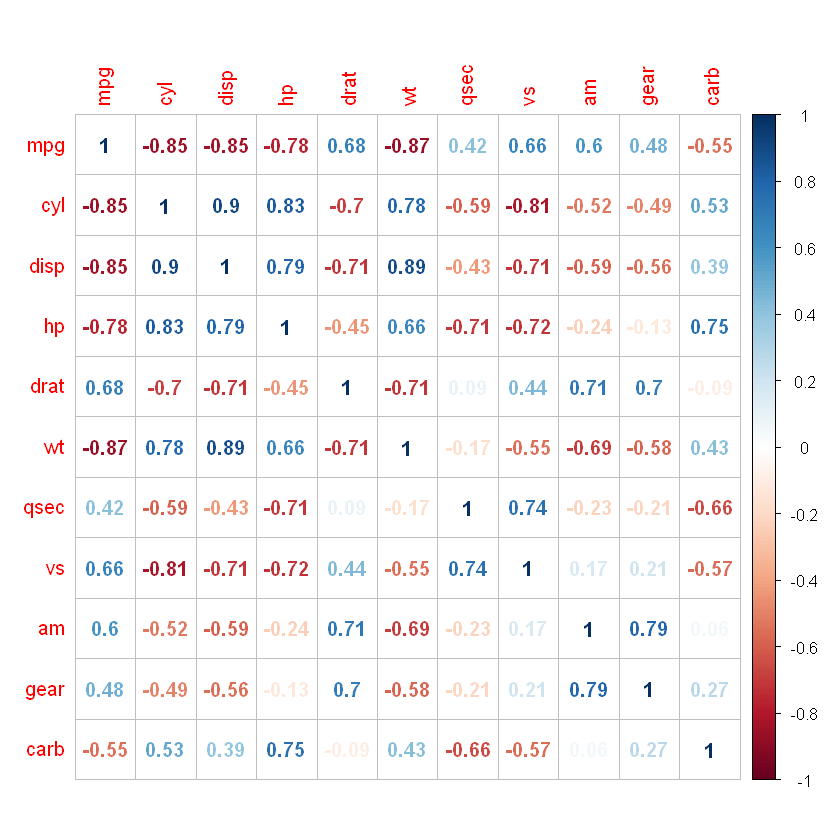

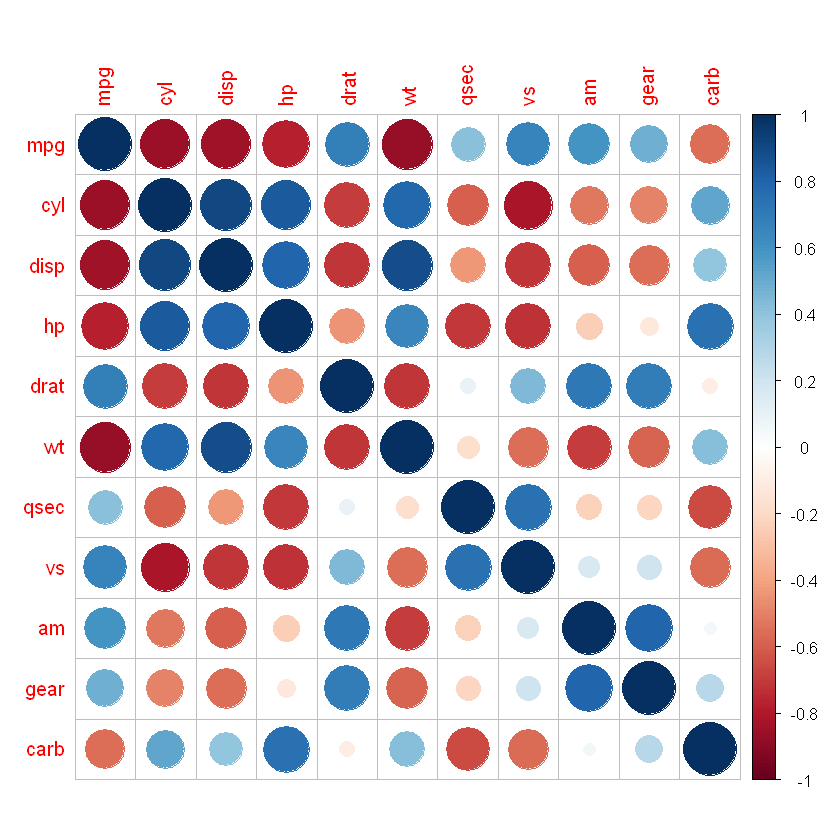

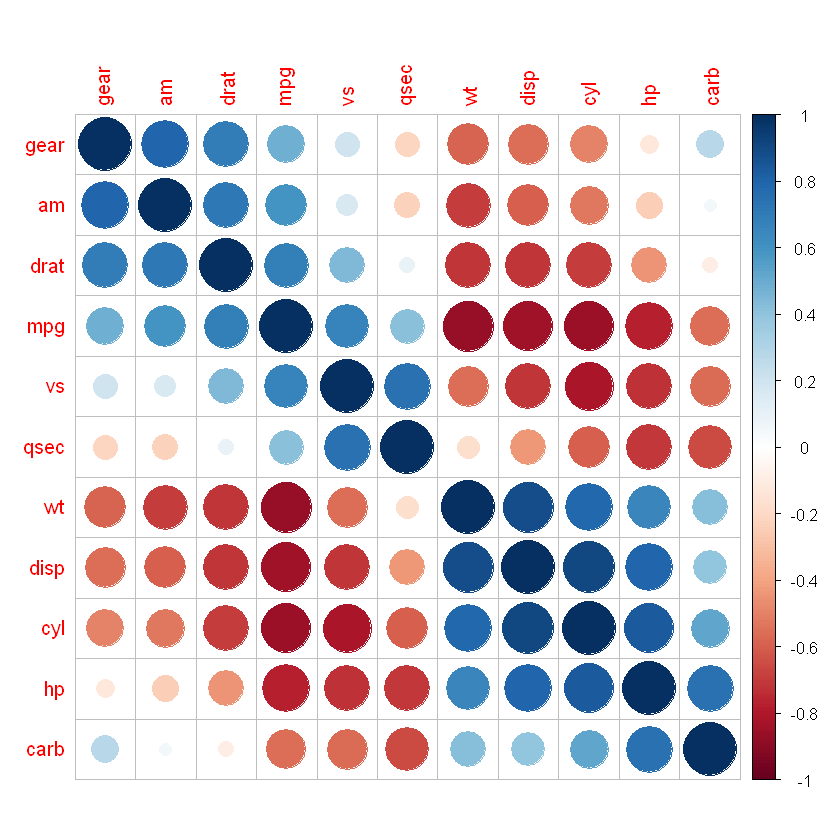

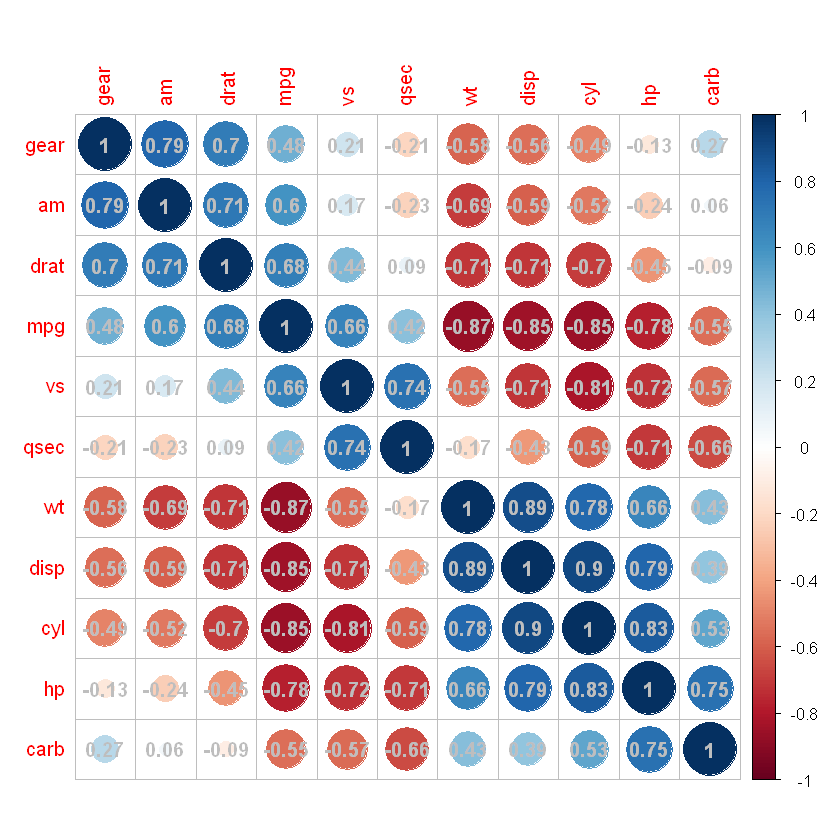

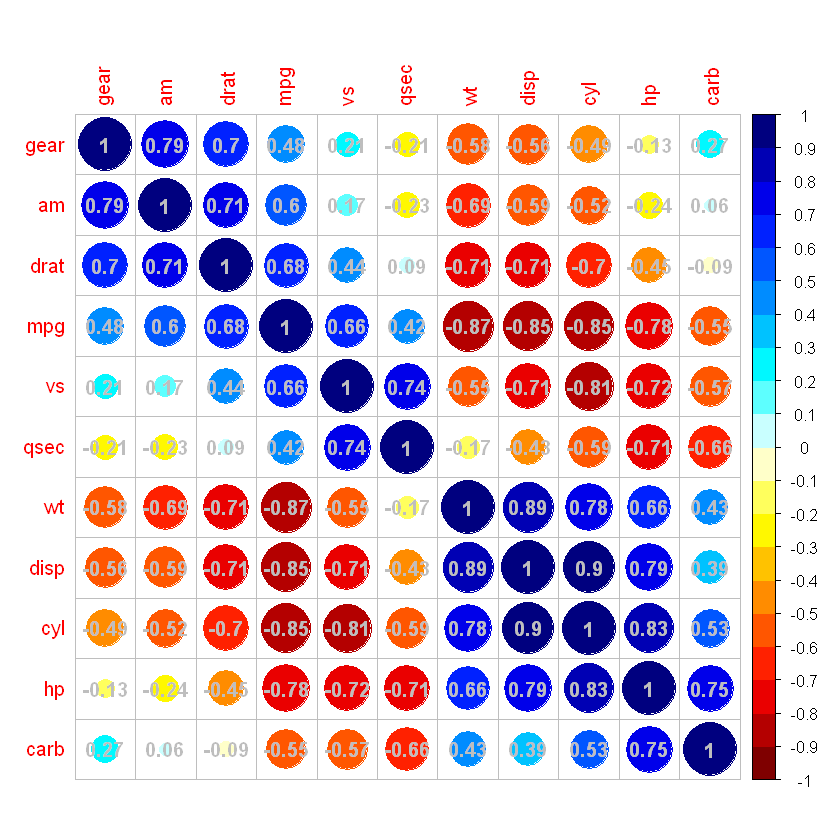

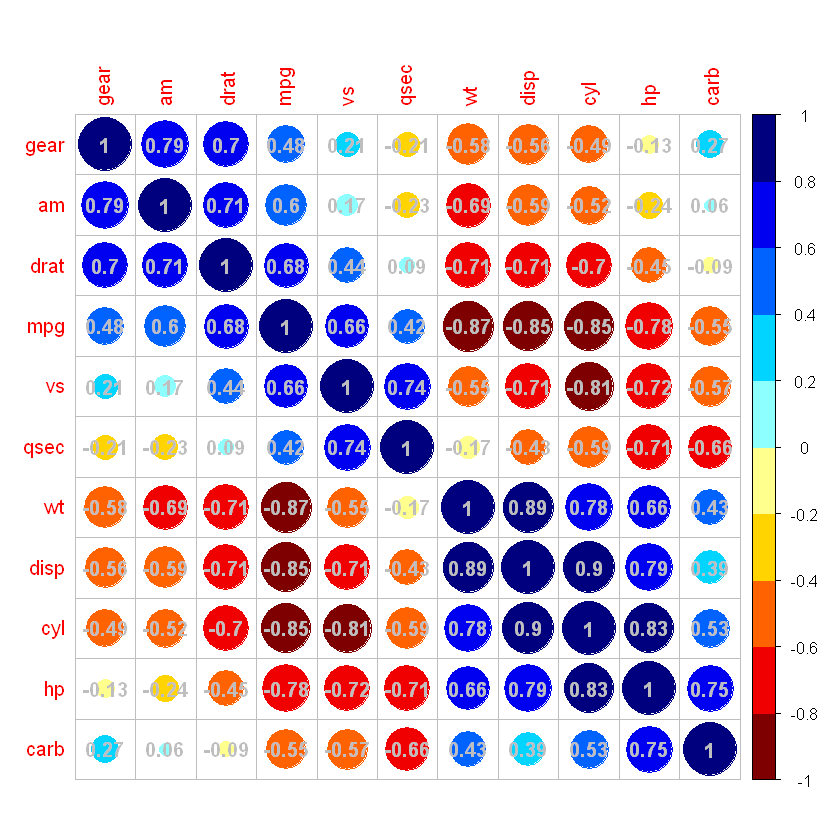

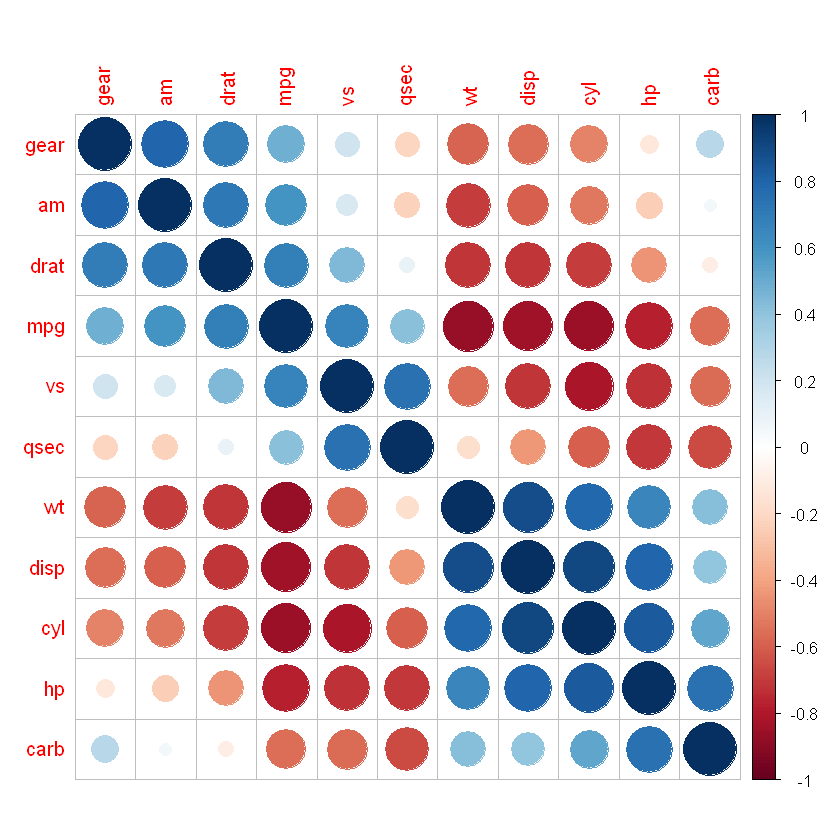

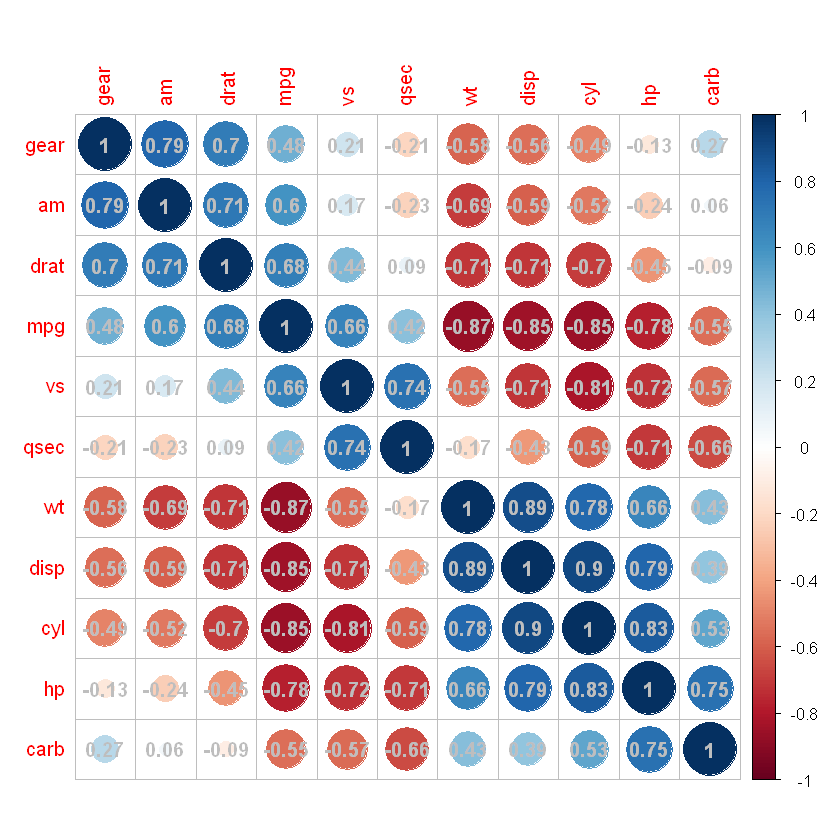

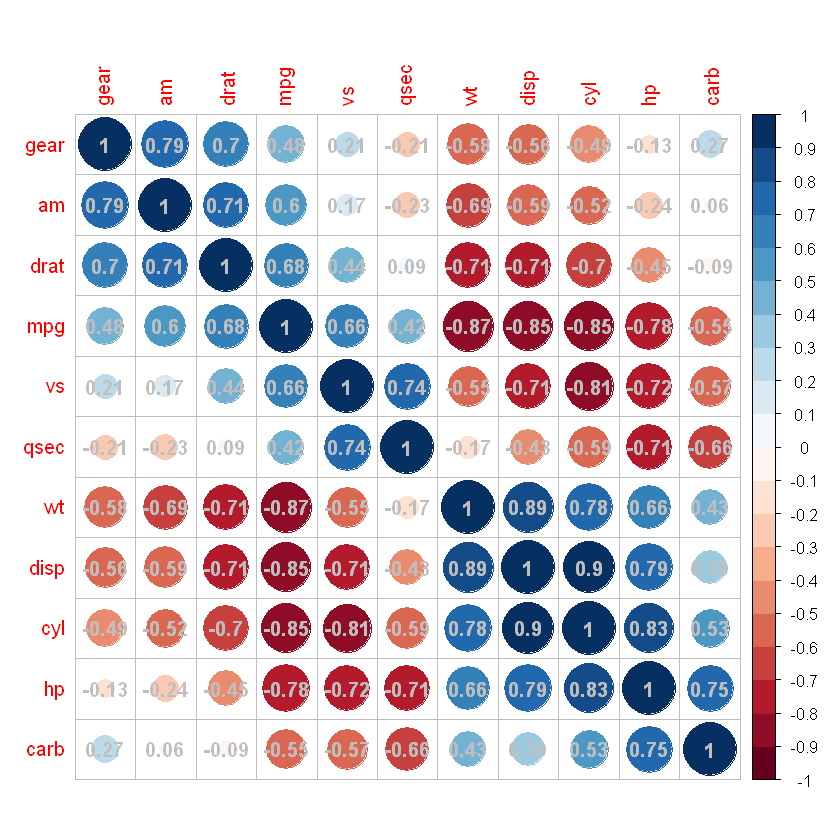

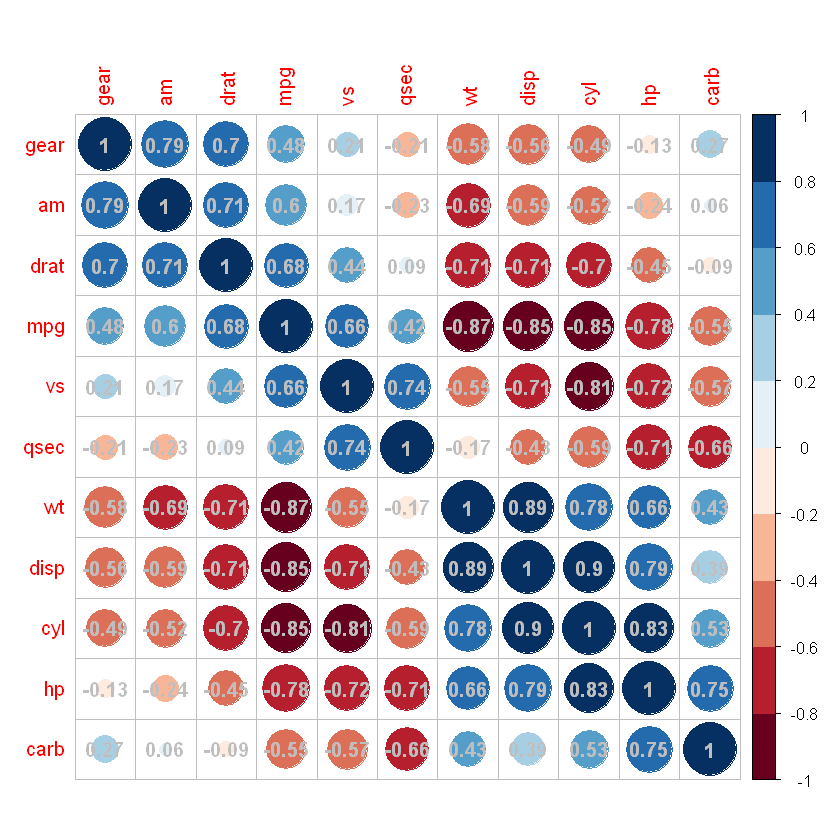

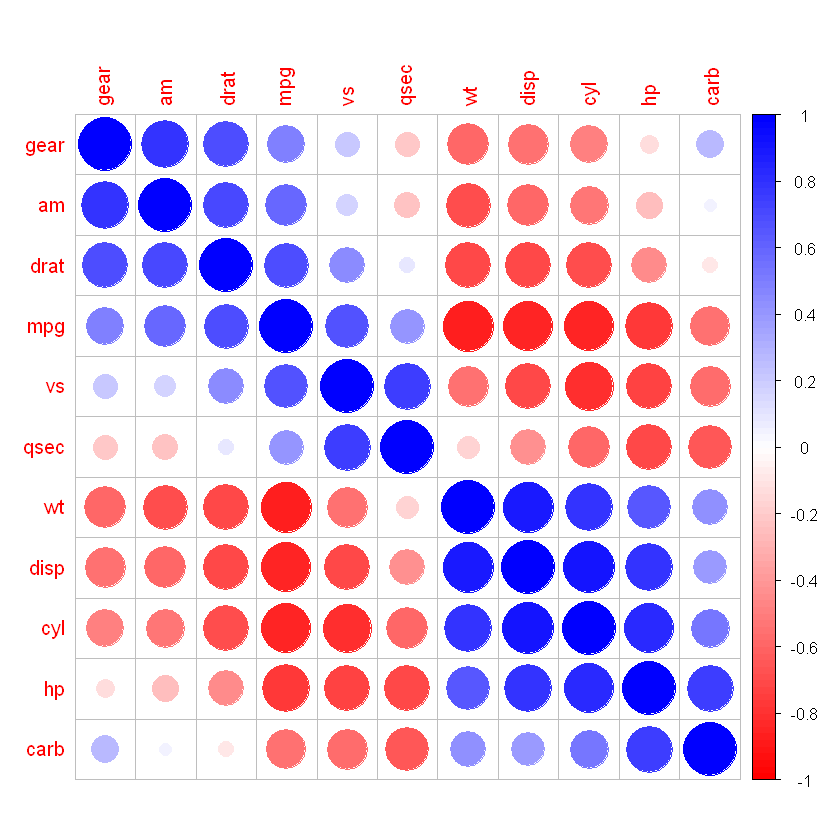

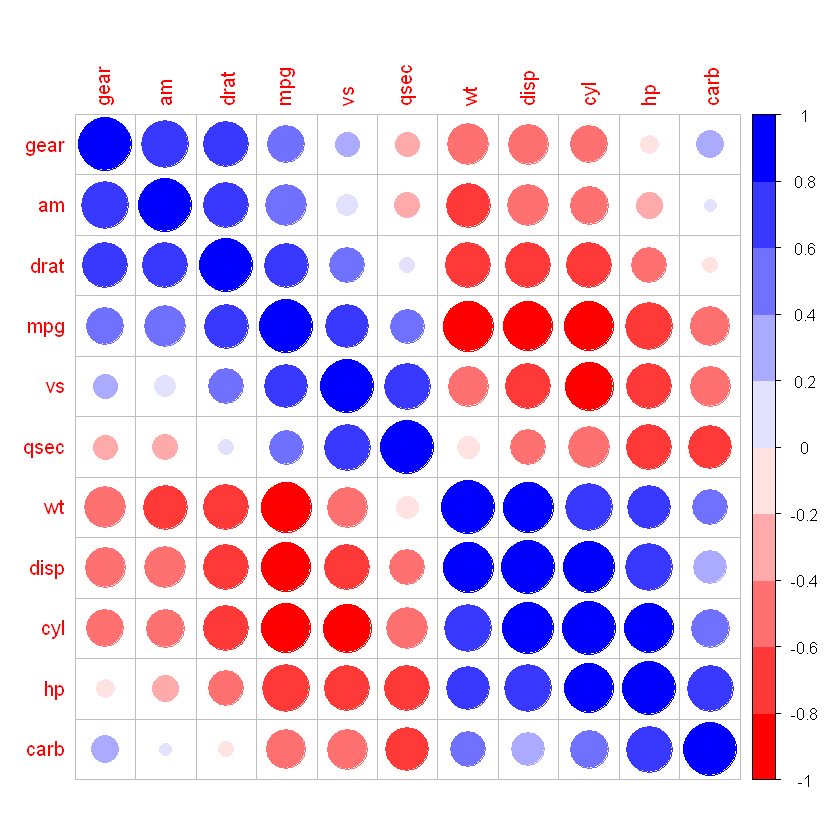

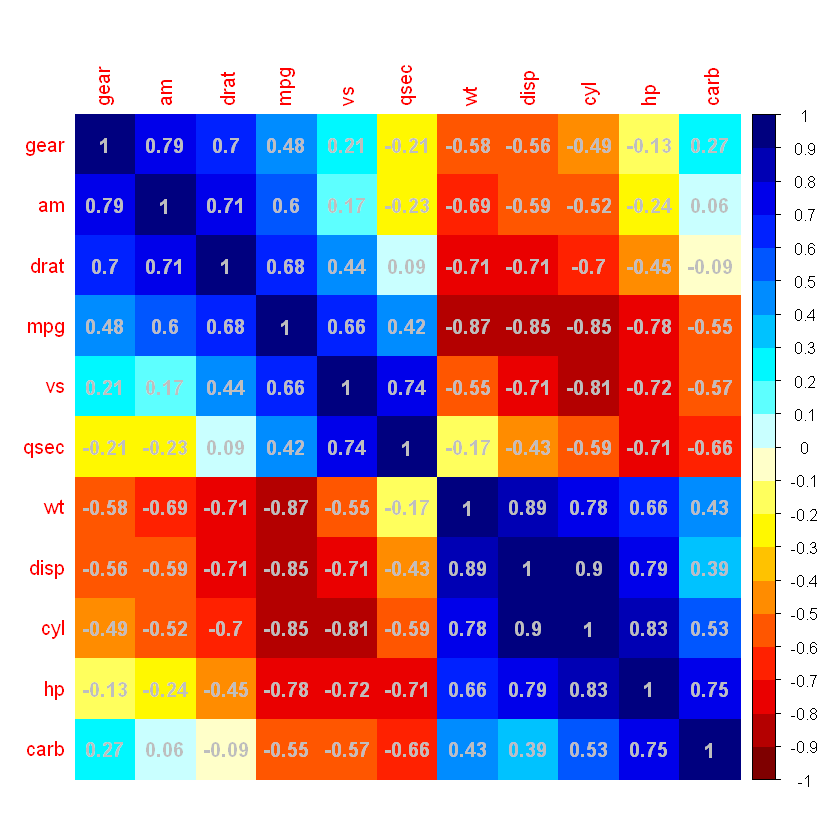

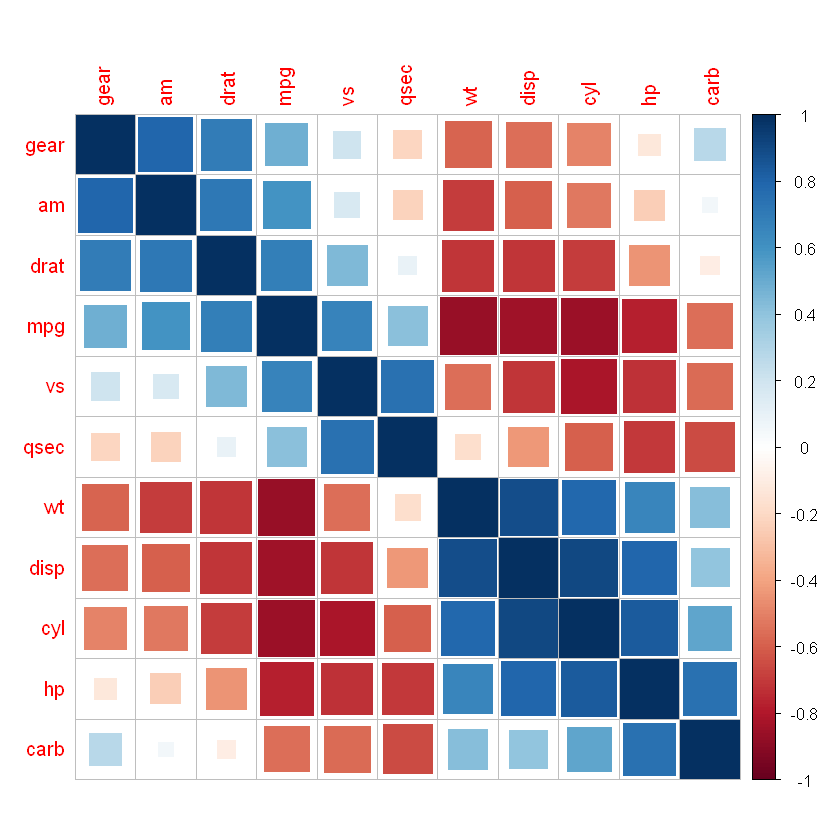

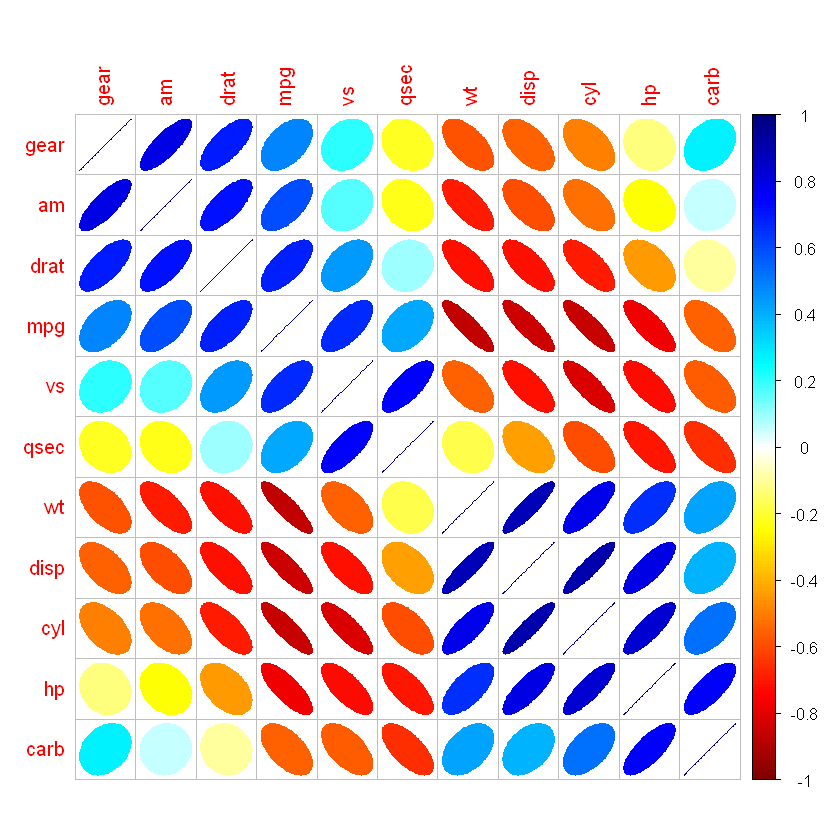

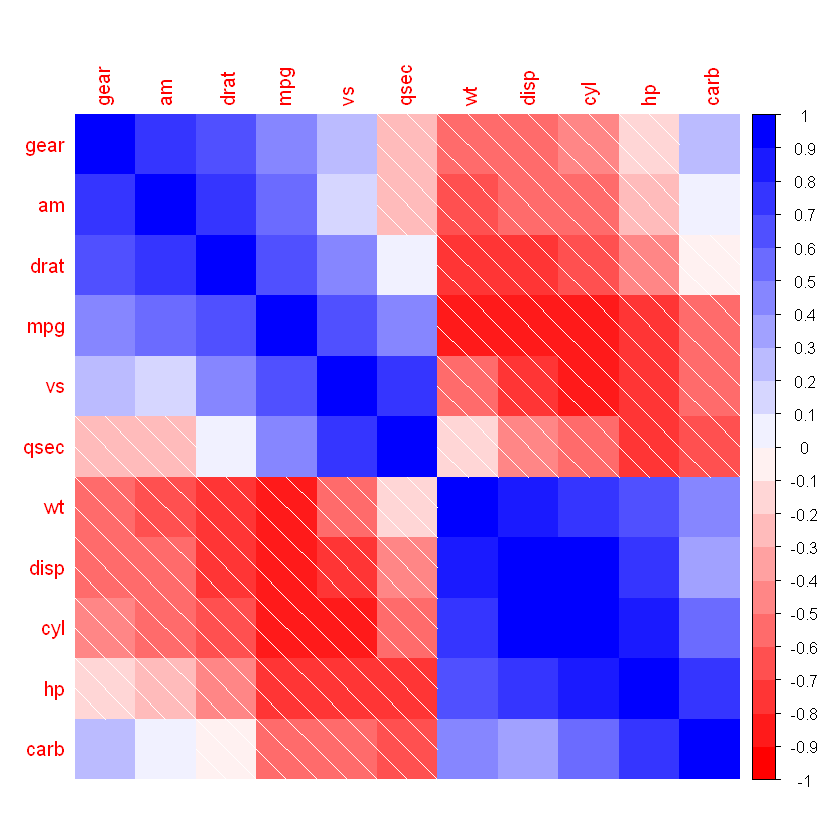

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""addcolorlabel" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""addcolorlabel" is not a graphical parameter"Warning message in title(title, ...):
""addcolorlabel" is not a graphical parameter"

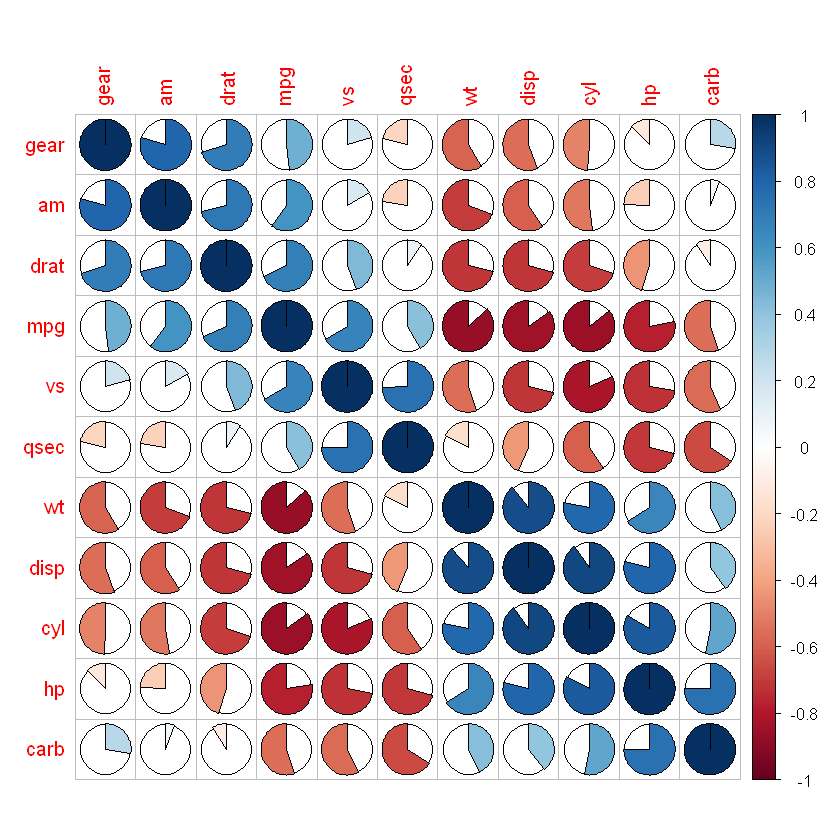

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""addcolorlabel" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""addcolorlabel" is not a graphical parameter"Warning message in title(title, ...):
""addcolorlabel" is not a graphical parameter"

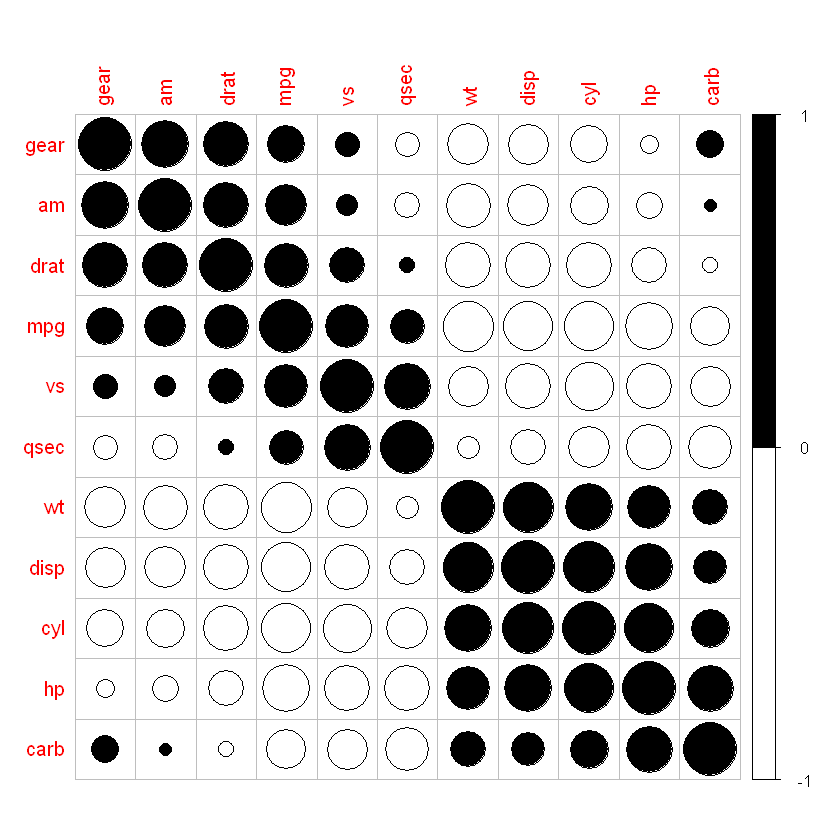

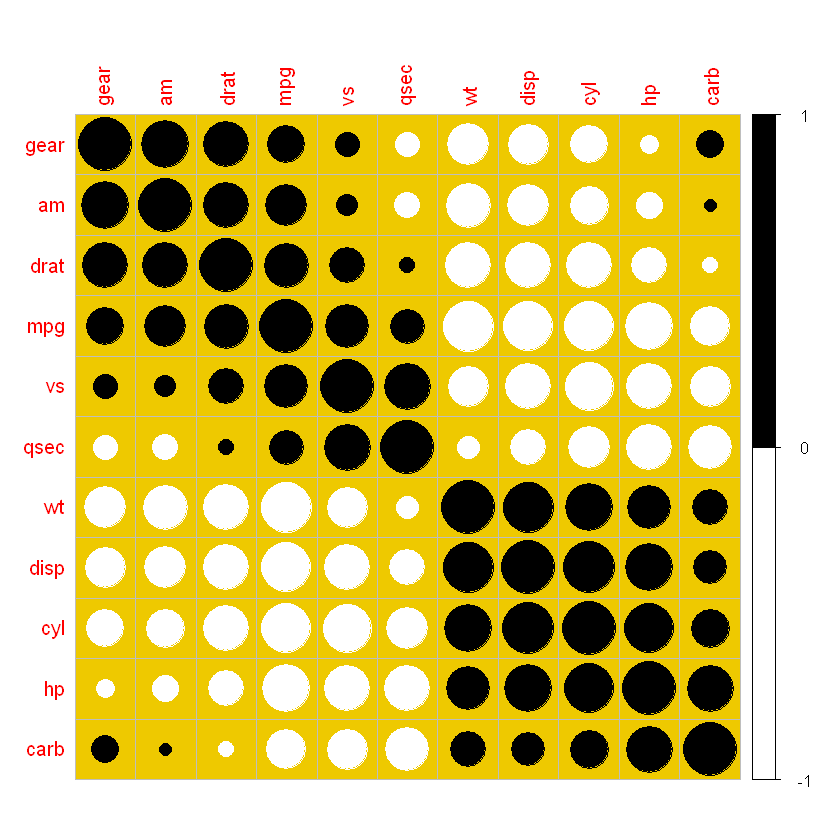

In [17]:
library(corrplot)
data(mtcars)
M <- cor(mtcars)
##  different color series
col1 <- colorRampPalette(c("#7F0000","red","#FF7F00","yellow","white", 
        "cyan", "#007FFF", "blue","#00007F"))
col2 <- colorRampPalette(c("#67001F", "#B2182B", "#D6604D", "#F4A582", "#FDDBC7",
        "#FFFFFF", "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC", "#053061"))  
col3 <- colorRampPalette(c("red", "white", "blue")) 
col4 <- colorRampPalette(c("#7F0000","red","#FF7F00","yellow","#7FFF7F", 
        "cyan", "#007FFF", "blue","#00007F"))   
wb <- c("white","black")


par(ask = TRUE)


## different color scale and methods to display corr-matrix
corrplot(M, method="number", col="black", addcolorlabel="no")
corrplot(M, method="number")
corrplot(M)
corrplot(M, order ="AOE")
corrplot(M, order ="AOE", addCoef.col="grey")

corrplot(M, order="AOE", col=col1(20), cl.length=21,addCoef.col="grey")
corrplot(M, order="AOE", col=col1(10),addCoef.col="grey")

corrplot(M, order="AOE", col=col2(200))
corrplot(M, order="AOE", col=col2(200),addCoef.col="grey")
corrplot(M, order="AOE", col=col2(20), cl.length=21,addCoef.col="grey")
corrplot(M, order="AOE", col=col2(10),addCoef.col="grey")

corrplot(M, order="AOE", col=col3(100))
corrplot(M, order="AOE", col=col3(10))



corrplot(M, method="color", col=col1(20), cl.length=21,order = "AOE", addCoef.col="grey")

if(TRUE){

corrplot(M, method="square", col=col2(200),order = "AOE")

corrplot(M, method="ellipse", col=col1(200),order = "AOE")


corrplot(M, method="shade", col=col3(20),order = "AOE")

corrplot(M, method="pie", order = "AOE")


## col=wb
corrplot(M, col = wb, order="AOE", outline=TRUE, addcolorlabel="no")
## like Chinese wiqi, suit for either on screen or white-black print.
corrplot(M, col = wb, bg="gold2",  order="AOE", addcolorlabel="no")
}